In [56]:
import sys
import os
import numpy as np
import pandas as pd
import gmaps
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
from Fire_helpers import csv_to_df, df_to_heatmap
from settings_ECE180 import GOOGLE_API_KEY, data_path
%matplotlib inline

In [57]:
# create dataframe and save output for each year with mean values
slice_data_dir = 'MM_CA_keep_landocean'
outdir = 'year_avg'

for i in range(0,18):
    if i >= 10:
        y = '20{}'.format(i)
    else:
        y = '200{}'.format(i)
    
    outf = 'FIRE-'+y+'.csv'

    n=0
    for dirpath, dnames, fnames in os.walk(os.path.join(data_path,slice_data_dir)):
        for f in fnames:
            if f.startswith("FIRE_"+y):
                if n<1:
                    df1 = pd.read_csv(os.path.join('.','data',slice_data_dir,f))
                    n+=1
                else:
                    df = pd.read_csv(os.path.join('.','data',slice_data_dir,f))
                    df1 = df1.append(df)

    # get rid of land mask (replace 0.1 with 0, because 0.1 represents land values)
    df1['mag'].replace(0.1,0, inplace=True)

    # Calculate mean values
    # Create a groupby variable that groups mag by lat and lon
    df2 = df1.groupby(['lat', 'lon']).mean()
    lon1 = df1['lon'].values
    lat1 = df1['lat'].values

    lon_avg = np.sort(list(set(lon1)))
    lat_avg = np.sort(list(set(lat1)))
    mag_avg = df2['mag'].values

    # create dataframe and save
    y_df = pd.DataFrame({'lat':list(reversed(df['lat'].values)),'lon':df['lon'].values,'mag':mag_avg})
    # y_df = MM_df.set_index('lat')
    # y_df.sort_index(inplace=True)
    y_df.to_csv
    y_df.to_csv(os.path.join(data_path,outdir,outf))
    print outf + ': Done!'

FIRE-2000.csv: Done!
FIRE-2001.csv: Done!
FIRE-2002.csv: Done!
FIRE-2003.csv: Done!
FIRE-2004.csv: Done!
FIRE-2005.csv: Done!
FIRE-2006.csv: Done!
FIRE-2007.csv: Done!
FIRE-2008.csv: Done!
FIRE-2009.csv: Done!
FIRE-2010.csv: Done!
FIRE-2011.csv: Done!
FIRE-2012.csv: Done!
FIRE-2013.csv: Done!
FIRE-2014.csv: Done!
FIRE-2015.csv: Done!
FIRE-2016.csv: Done!
FIRE-2017.csv: Done!


"\nfig = plt.figure()\n\nim = []\ny = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']           \nfor i in range(0,18):                \n    outf = 'FIRE-'+y[i]+'.csv'\n    y_df = pd.read_csv(os.path.join('.','data','year_avg',outf))\n    lon_mag = y_df['lon'].values\n    lat_mag = y_df['lat'].values\n    mag = y_df['mag'].values\n    if i>=15 and i=8 and i=6:\n        y_df['mag'].replace(99999,-2, inplace=True)\n    elif i=10:\n        y_df['mag'].replace(99999,-0.8, inplace=True)\n    else\n        y_df['mag'].replace(99999,-1, inplace=True)\n    loncf = np.sort(list(set(lon_mag)))\n    latcf = np.sort(list(set(lat_mag)))\n    magcf = np.reshape(mag, (len(latcf),len(loncf)))\n    heatmap = plt.imshow(np.array(np.reshape(mag, (len(latcf),len(loncf)))), origin='lower', cmap='Paired', interpolation='nearest', animated=True)\n    plt.xticks([])\n    plt.yticks([])\n    im.append([heatmap])\n\nani = animation.

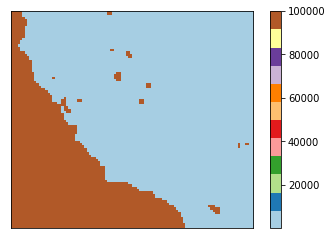

In [189]:
import matplotlib.animation as animation

outdir = 'year_avg'
y = "2000"
outf = 'FIRE-'+y+'.csv'
y_df = pd.read_csv(os.path.join('.','data',outdir,outf))

lon_mag = y_df['lon'].values
lat_mag = y_df['lat'].values
mag = y_df['mag'].values

y_df['mag'].replace(99999,-1,inplace=True)


loncf = np.sort(list(set(lon_mag)))
latcf = np.sort(list(set(lat_mag)))
magcf = np.reshape(mag, (len(latcf),len(loncf)))

heatmap = plt.imshow(np.array(np.reshape(mag, (len(latcf),len(loncf)))), origin='lower', cmap='Paired', interpolation='nearest',animated=True)

plt.xticks([])
plt.yticks([])

colorbar=plt.colorbar(heatmap)

fig = plt.figure()

im = []
y = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']           
for i in range(0,18):                
    outf = 'FIRE-'+y[i]+'.csv'
    y_df = pd.read_csv(os.path.join('.','data','year_avg',outf))
    lon_mag = y_df['lon'].values
    lat_mag = y_df['lat'].values
    mag = y_df['mag'].values
    if i>=15 and i=8 and i=6:
        y_df['mag'].replace(99999,-2, inplace=True)
    elif i=10:
        y_df['mag'].replace(99999,-0.8, inplace=True)
    else
        y_df['mag'].replace(99999,-1, inplace=True)
    loncf = np.sort(list(set(lon_mag)))
    latcf = np.sort(list(set(lat_mag)))
    magcf = np.reshape(mag, (len(latcf),len(loncf)))
    heatmap = plt.imshow(np.array(np.reshape(mag, (len(latcf),len(loncf)))), origin='lower', cmap='Paired', interpolation='nearest', animated=True)
    plt.xticks([])
    plt.yticks([])
    im.append([heatmap])

ani = animation.ArtistAnimation(fig, im, interval=50, blit=True, repeat_delay=1)
ani.save('dynamic_images.mp4')
plt.show()
